In [ ]:
!pip install kmodes

## Import required libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load dataset

In [2]:
## load data set
data = pd.read_csv(r'fake_transactional_data_24.csv')
## head
data.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


## Explore data 

In [3]:
data.shape

(10148280, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 4 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   from_totally_fake_account      float64
 1   monopoly_money_amount          float64
 2   to_randomly_generated_account  object 
 3   not_happened_yet_date          object 
dtypes: float64(2), object(2)
memory usage: 309.7+ MB


In [5]:
data.dtypes

from_totally_fake_account        float64
monopoly_money_amount            float64
to_randomly_generated_account     object
not_happened_yet_date             object
dtype: object

In [6]:
data.columns 

Index(['from_totally_fake_account', 'monopoly_money_amount',
       'to_randomly_generated_account', 'not_happened_yet_date'],
      dtype='object')

In [7]:
data.dtypes

from_totally_fake_account        float64
monopoly_money_amount            float64
to_randomly_generated_account     object
not_happened_yet_date             object
dtype: object

## Missing values 

In [8]:
data.isnull()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
10148275,False,False,False,False
10148276,False,False,False,False
10148277,False,False,False,False
10148278,False,False,False,False


In [9]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 from_totally_fake_account        0
monopoly_money_amount            0
to_randomly_generated_account    0
not_happened_yet_date            0
dtype: int64


### Statistical information of given data

In [10]:
data.describe()

,from_totally_fake_account,monopoly_money_amount
count,1.014828e+07,1.014828e+07
mean,5.080502e+04,1.839348e+01
std,2.893710e+04,8.612323e+01
min,1.000000e+03,1.450000e+00
25%,2.530400e+04,2.650000e+00
50%,5.078100e+04,6.000000e+00
75%,7.563300e+04,1.200000e+01
max,1.009880e+05,1.995000e+03


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
from_totally_fake_account,10148280.0,50805.021701,28937.100678,1000.00,25304.00,50781.0,75633.0,100988.0
monopoly_money_amount,10148280.0,18.393485,86.123232,1.45,2.65,6.0,12.0,1995.0


In [12]:
data.describe(include=['O'])

,to_randomly_generated_account,not_happened_yet_date
count,10148280,10148280
unique,14300,364
top,PUB,12/12/2025
freq,834380,52379


In [13]:
data.describe().astype(int)

,from_totally_fake_account,monopoly_money_amount
count,10148280,10148280
mean,50805,18
std,28937,86
min,1000,1
25%,25304,2
50%,50781,6
75%,75633,12
max,100988,1995


In [14]:
data.describe(include='all')

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
count,1.014828e+07,1.014828e+07,10148280,10148280
unique,NaN,NaN,14300,364
top,NaN,NaN,PUB,12/12/2025
freq,NaN,NaN,834380,52379
mean,5.080502e+04,1.839348e+01,NaN,NaN
std,2.893710e+04,8.612323e+01,NaN,NaN
min,1.000000e+03,1.450000e+00,NaN,NaN
25%,2.530400e+04,2.650000e+00,NaN,NaN
50%,5.078100e+04,6.000000e+00,NaN,NaN
75%,7.563300e+04,1.200000e+01,NaN,NaN


In [15]:
#data.transpose()

In [16]:
##sns.heatmap(data.corr(),annot=True)-- char to int

In [17]:
## convert data (char to int) to plot heatmap

In [18]:
## float to integer
data['from_totally_fake_account'] = data['from_totally_fake_account'].astype(int)

In [19]:
# nearest integer/ rounding
data['monopoly_money_amount'] = data['monopoly_money_amount'].round().astype(int)

In [20]:
data.head(3)

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371,4,CINEMA,01/01/2025
1,88339,2,40544,01/01/2025
2,18555,2,85149,01/01/2025


## Visualisations:

# Customer segmentation
1. Segmentation by 'Monopoly Money Amount' (Transaction Amount of user)
2. Segmentation by (count) Transaction Frequency (No. of transactions)
3. Segmentation by 'To Randomly Generated Account' (to whoom they are paying)
4. Segmentation by Date (On which date)
5. Combination of Segmentation Criteria (To get targets)

### 1. Segmentation by 'Monopoly Money Amount' (Transaction Amount of user)

In [21]:
transaction_amount = data['monopoly_money_amount'].describe()
#transaction_amount

In [22]:
highest_spent_amount = data['monopoly_money_amount'].max()
highest_spent_amount

1995

In [ ]:
# Segmentation for customers based on transaction amount ranges

# bins for segmentation
#bins = [-float('inf'), 100, 800, 1000, float('inf')] ##  dividing range of values based on monopoly amount
#labels = ['Less', 'Medium', 'High', 'Very-High']  ## grouping bins.

# Create a new column for segment labels
#data['transaction_amount_segment'] = pd.cut(data['monopoly_money_amount'], bins=bins, labels=labels)
## pd.cut()- segment and sort data values into bins

## data['transaction_amount_segment']
#data['transaction_amount_segment'].value_counts()  ###count 

In [23]:
# Automatic segmentation based on quantiles
transaction_amount_segment = pd.qcut(data['monopoly_money_amount'], q=3, labels=['Low segment', 'Medium', 'High segment'])

# Count the number of transactions in each segment
segment_counts = transaction_amount_segment.value_counts()
print(segment_counts)

monopoly_money_amount
Low segment     3599719
Medium          3409943
High segment    3138618
Name: count, dtype: int64


In [24]:
# average transaction amounts for each segment
average_amounts = data.groupby(transaction_amount_segment)['monopoly_money_amount'].mean()
print("Average Transaction Amounts by Segment:\n", average_amounts)

Average Transaction Amounts by Segment:
 monopoly_money_amount
Low segment      2.599610
Medium           7.054123
High segment    48.744555
Name: monopoly_money_amount, dtype: float64


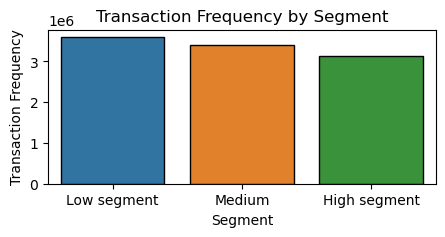

In [25]:
# Visualize customer patterns using transaction frequency
plt.figure(figsize=(5,2))
sns.countplot(x=transaction_amount_segment, edgecolor='black')
plt.xlabel('Segment')
plt.ylabel('Transaction Frequency')
plt.title('Transaction Frequency by Segment')
plt.show()

In [ ]:
## might be useful for marketing

### 2. Segmentation by (count) Transaction Frequency (No. of transactions)

In [36]:
# Count unique transactions per account
unique_transactions = data.groupby('from_totally_fake_account')['to_randomly_generated_account'].nunique()

# Define thresholds for segmentation (e.g., based on quartiles)
quantiles = unique_transactions.quantile([0.25, 0.5, 0.75])
thresholds = [0, quantiles.iloc[0], quantiles.iloc[1], quantiles.iloc[2], float('inf')]

# Function to categorize transaction frequency
def categorize_frequency(count):
    for i in range(1, len(thresholds)):
        if thresholds[i] == float('inf'):
            return f"Segment {i-1}: More than {thresholds[i-1]} transactions"
        elif count <= thresholds[i]:
            return f"Segment {i-1}: {thresholds[i-1]+1} - {thresholds[i]} transactions"

# Apply categorization to create a new column for transaction frequency segment
data['frequency_segment'] = data['from_totally_fake_account'].map(unique_transactions.apply(categorize_frequency))

# Display the segmentation results
print(data[['from_totally_fake_account', 'frequency_segment']].head())


   from_totally_fake_account                       frequency_segment
0                      10371        Segment 0: 1 - 55.0 transactions
1                      88339  Segment 3: More than 65.0 transactions
2                      18555  Segment 3: More than 65.0 transactions
3                      18555  Segment 3: More than 65.0 transactions
4                      80792     Segment 1: 56.0 - 61.0 transactions


In [34]:
unique_transactions.shape

(8142,)

In [45]:
#unique_transactions

In [40]:

# Sort the unique transaction counts in descending order
sorted_unique_transactions = unique_transactions.sort_values(ascending=False)

# Extract the customers with the highest and lowest transaction frequencies
highest_transaction_customers = sorted_unique_transactions.head(2)  # count
lowest_transaction_customers = sorted_unique_transactions.tail(2)  # Count
#highest_transaction_customers

In [41]:
data.head(3)

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,frequency_segment
0,10371,4,CINEMA,01/01/2025,Segment 0: 1 - 55.0 transactions
1,88339,2,40544,01/01/2025,Segment 3: More than 65.0 transactions
2,18555,2,85149,01/01/2025,Segment 3: More than 65.0 transactions


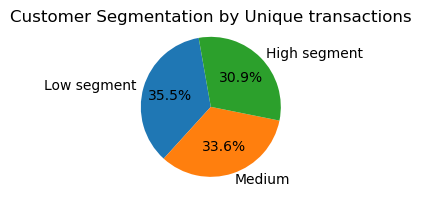

In [42]:
# Plot pie chart
plt.figure(figsize=(5,2))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Customer Segmentation by Unique transactions')
plt.axis('equal')  #to draw a circle.
plt.show()

### 3. Segmentation by 'To Randomly Generated Account' (to whoom they are paying)

In [43]:
# Count the number of transactions for each account type
account_type_counts = data['to_randomly_generated_account'].value_counts()
account_type_counts

to_randomly_generated_account
PUB                           834380
BAR                           770414
LOCAL_WATERING_HOLE           649043
COFFEE_SHOP                   476099
TOTALLY_A_REAL_COFFEE_SHOP    476064
                               ...  
74519                              2
24699                              2
1243                               2
95337                              2
20594                              1
Name: count, Length: 14300, dtype: int64

In [50]:
# Group the data by 'from_totally_fake_account' and 'to_randomly_generated_account', then count occurrences
user_spending = data.groupby(['from_totally_fake_account', 'to_randomly_generated_account']).size().reset_index(name='transaction_count')

# Merge the calculated counts back into the original DataFrame
data = pd.merge(data, user_spending, on=['from_totally_fake_account', 'to_randomly_generated_account'], how='left')
data

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,frequency_segment,transaction_count_x,transaction_count_y,transaction_count
0,10371,4,CINEMA,01/01/2025,Segment 0: 1 - 55.0 transactions,24,67715,24
1,88339,2,40544,01/01/2025,Segment 3: More than 65.0 transactions,20,159,20
2,18555,2,85149,01/01/2025,Segment 3: More than 65.0 transactions,34,168,34
3,18555,4,HIPSTER_COFFEE_SHOP,01/01/2025,Segment 3: More than 65.0 transactions,122,232588,122
4,80792,2,18555,01/01/2025,Segment 1: 56.0 - 61.0 transactions,40,185,40
...,...,...,...,...,...,...,...,...
10148275,32185,3,COFFEE_SHOP,31/12/2025,Segment 0: 1 - 55.0 transactions,52,476099,52
10148276,32185,2,COFFEE_SHOP,31/12/2025,Segment 0: 1 - 55.0 transactions,52,476099,52
10148277,57569,14,WINE_BAR,31/12/2025,Segment 3: More than 65.0 transactions,52,121995,52
10148278,1490,9,57569,31/12/2025,Segment 0: 1 - 55.0 transactions,42,205,42


In [ ]:
# Find the index of the maximum spending for each user
max_spending_index = data.groupby('from_totally_fake_account')['monopoly_money_amount'].idxmax()

# Use the index to retrieve the corresponding 'to_randomly_generated_account' for the maximum spending
max_spending_by_user = data.loc[max_spending_index, ['from_totally_fake_account', 'to_randomly_generated_account', 'monopoly_money_amount']]
#max_spending_by_user

In [ ]:
from kmodes.kmodes import KModes

# Extract the 'To Randomly Generated Account' column
to_randomly_generated_account = data['to_randomly_generated_account']

# Initialize KModes clustering with desired number of clusters
num_clusters = 5  # You can adjust this number as needed
km = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)

# Fit the KModes model to the data
clusters = km.fit_predict(to_randomly_generated_account.values.reshape(-1, 1))

# Add the cluster labels to the original data
data['cluster'] = clusters

# View the distribution of customers across clusters
print(data['cluster'].value_counts())

# Explore the characteristics of each cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    print(data[data['cluster'] == cluster_num]['to_randomly_generated_account'].unique())

In [ ]:
# Initialize counters
numeric_count = 0
categorical_count = 0

# Iterate through unique values in the column
for value in data['to_randomly_generated_account'].unique():
    # Try to convert the value to a numeric type
    try:
        float(value)
        # If successful, increment numeric count
        numeric_count += 1
    except ValueError:
        # If conversion fails, it's categorical
        categorical_count += 1

# Print the counts
print("Numeric values count:", numeric_count)
print("Categorical values count:", categorical_count)

In [ ]:
# Print out the unique categorical values
categorical_values = data.loc[~data['to_randomly_generated_account'].apply(lambda x: str(x).replace('.', '').isdigit()), 'to_randomly_generated_account'].unique()
print("Unique categorical values:")
print(categorical_values)

### 4. Segmentation by Date (On which date)

In [ ]:
# Convert 'not_happened_yet_date' column to datetime
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%d/%m/%Y')

### A. Weekly Segmentation 

In [ ]:
# Grouping by User and Week, calculating weekly spend
weekly_spending = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('W')])['monopoly_money_amount'].sum()

# Resetting index and pivoting the data
weekly_spending = weekly_spending.reset_index().pivot(index='from_totally_fake_account', columns='not_happened_yet_date', values='monopoly_money_amount')

# Printing the weekly spend for each user
print("Weekly Spend by User:")
print(weekly_spending)

In [ ]:
# Summing up the weekly spending for each user
weekly_spending['Total'] = weekly_spending.sum(axis=1)

# Sorting users based on their total spending
w_top_10_users = weekly_spending.nlargest(10, 'Total')

# Printing the top 10 users
print("Top 10 Users by Weekly Spending:")
print(w_top_10_users)

### B. Monthly Segmentation: 

In [ ]:
# Grouping by User and Week, calculating weekly spend
m_spending = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('M')])['monopoly_money_amount'].sum()

# Resetting index and pivoting the data
m_spending =m_spending.reset_index().pivot(index='from_totally_fake_account', columns='not_happened_yet_date', values='monopoly_money_amount')

# Printing the weekly spend for each user
print("m Spend by User:")
print(m_spending)

In [ ]:
m_spending.head(3)
#m_spending.shape

In [ ]:
# Summing up the weekly spending for each user
m_spending['Total'] = m_spending.sum(axis=1)

# Sorting users based on their total spending
m_top_10_users = m_spending.nlargest(10, 'Total')

# Printing the top 10 users
print("Top 10 Users by monthly Spending:")
print(m_top_10_users)

### Yearly Segmentation:

In [ ]:
# Grouping by User and Week, calculating weekly spend
y_spending = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('Y')])['monopoly_money_amount'].sum()

# Resetting index and pivoting the data
y_spending =y_spending.reset_index().pivot(index='from_totally_fake_account', columns='not_happened_yet_date', values='monopoly_money_amount')

# Printing the weekly spend for each user
print("yearly Spend by User:")
print(y_spending)

In [ ]:
# Summing up the weekly spending for each user
y_spending['Total'] = y_spending.sum(axis=1)

# Sorting users based on their total spending
y_top_10_users = y_spending.nlargest(10, 'Total')

# Printing the top 10 users
print("Top 10 Users by monthly Spending:")
print(y_top_10_users)

### Lets see who spent more and where..... in whole data

In [ ]:
# Calculate total amount spent by each user
user_spending = data.groupby('from_totally_fake_account')['monopoly_money_amount'].sum()

# Find the user who spent the most money
user_with_max_spending = user_spending.idxmax()
max_spending_amount = user_spending.max()

print("User with the most spending:", user_with_max_spending)
print("Total amount spent by the user:", max_spending_amount)

# Find the transaction types where the user spent the most money
transactions_of_max_spender = data[data['from_totally_fake_account'] == user_with_max_spending]
max_spending_transaction_type = transactions_of_max_spender.groupby('to_randomly_generated_account')['monopoly_money_amount'].sum().idxmax()

print("Transaction type where the user spent the most money:", max_spending_transaction_type)

### WEEKLY MONTHLY YEARLY TOP USER PLOTS

In [ ]:
# Define a colormap
colors = plt.cm.tab10.colors  # You can choose any other colormap

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

# Plot for weekly spending
w_top_10_users.plot(kind='bar', y='Total', ax=axes[0], color=colors)
axes[0].set_title('Top 10 Users by Weekly Spending')
axes[0].set_xlabel('from_totally_fake_account')
axes[0].set_ylabel('monopoly_money_amount')

# Plot for monthly spending
m_top_10_users.plot(kind='bar', y='Total', ax=axes[1], color=colors)
axes[1].set_title('Top 10 Users by Monthly Spending')
axes[1].set_xlabel('from_totally_fake_account')
axes[1].set_ylabel('monopoly_money_amount')

# Plot for yearly spending
y_top_10_users.plot(kind='bar', y='Total', ax=axes[2], color=colors)
axes[2].set_title('Top 10 Users by Yearly Spending')
axes[2].set_xlabel('from_totally_fake_account')
axes[2].set_ylabel('monopoly_money_amount')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### 5. Combination of Segmentation Criteria (To get targets)

In [ ]:
combined_targets = set(w_top_10_users.index) & set(m_top_10_users.index)

# Now you have a set of users who are top spenders both weekly and monthly
print("Combined Targets:")
print(combined_targets)

In [ ]:

# Simulate spending data for each user
combined_targets_spending = {}
weeks = 20  # Assuming 20 weeks of spending data

for user_id in combined_targets:
    # Generate random spending values for each week
    spending_history = [random.randint(50, 500) for _ in range(weeks)]
    combined_targets_spending[user_id] = spending_history

# Plotting
plt.figure(figsize=(10,4))

for user_id, spending_history in combined_targets_spending.items():
    plt.plot(range(1, weeks + 1), spending_history, label=f'User {user_id}')

plt.title('Spending History of Combined Targets')
plt.xlabel('Week')
plt.ylabel('Spending')
plt.legend()
plt.grid(True)
plt.show()